# Data Mining and Visualisation -- Lab 3

In this lab, we will explore some common approaches for Exploratory Data Analysis (EDA).

First off, let's load our prerequisites for this lab:

In [1]:
# Import pandas and seaborn
import pandas as pd
import seaborn as sns

# Apply Seaborn's 'default' theme for visualisations
sns.set_theme()

# Make sure that our plots are visualised in jupyter
%matplotlib inline

Next, let's load a few datasets that we will work with.

If you run into any issues with this code, make sure you have the dataset files (`.csv`) in your working directory (i.e. where you are running the jupyter notebook). All of the datasets can be found in MyAberdeen, under the Datasets section for this module.

In [5]:
tips = pd.read_csv("dataset/tips.csv")

# flights = pd.read_csv("flights.csv")

# diamonds = pd.read_csv("diamonds.csv")

# taxis = pd.read_csv("taxis.csv")

# mpg = pd.read_csv("mpg.csv")

# car_crashes = pd.read_csv("car_crashes.csv")

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Common Types of Data Visualisations

There are various different types of data visualisations that we can generate using seaborn. We'll outline how you can generate some of the main types of visualisations that you might want to use. We'll then outline how you can use seaborn's API to tailor and customise various visual aspects of your visualisation.



### Bar Charts

We can make bar charts using seaborn's [`barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) function:

<Axes: xlabel='day', ylabel='tip'>

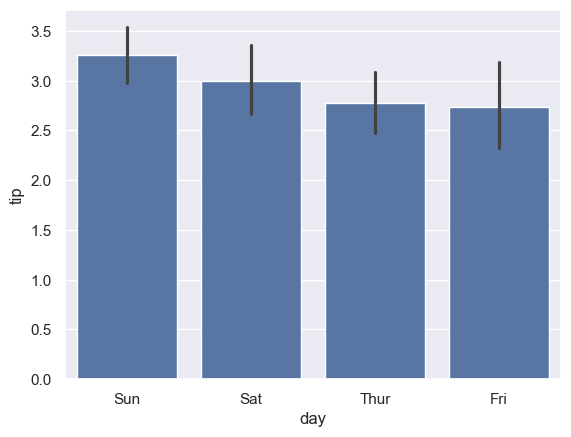

In [60]:
sns.barplot(tips, x="day", y="tip")

Note that we use the `estimator` argument to determine different aggregation functions. In the above case, the bar represents the mean -- the average value of tip for each day. However, if we wanted to, we can use other aggregation functions, such as calculating the `sum` of all tips for each day:

<Axes: xlabel='day', ylabel='tip'>

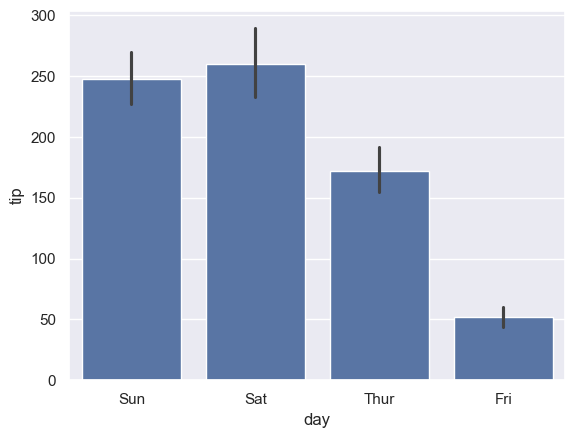

In [61]:
sns.barplot(tips, x="day", y="tip", estimator="sum")

We can also disable the error bar, should we wish to:

<Axes: xlabel='day', ylabel='tip'>

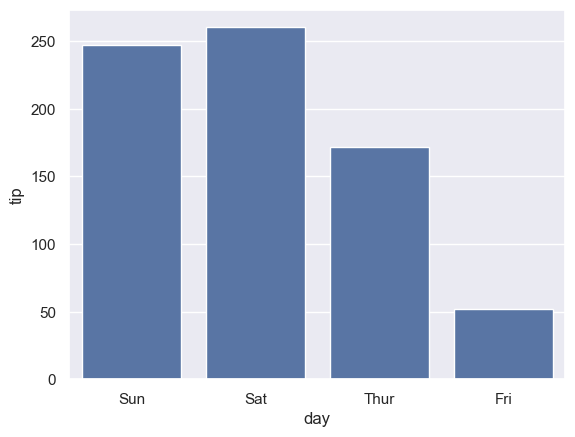

In [62]:
sns.barplot(tips, x="day", y="tip", estimator="sum", errorbar=None)

### Distribution Plots

Seaborn also gives us quick functions to visualise the distribution of the data in our dataset, using [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot):

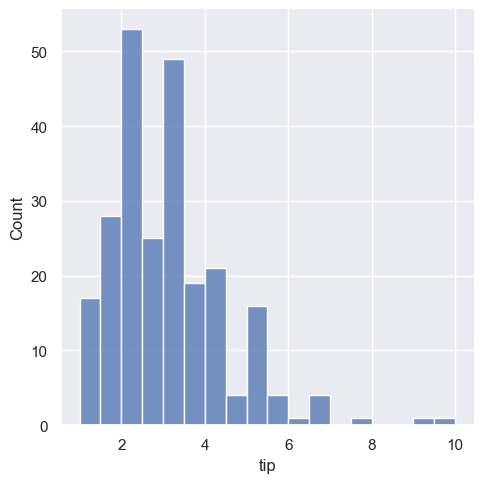

In [67]:
sns.displot(tips, x="tip")

By default, this gives us a histogram of the data. However, we can also change the `kind` of the distribution plot to show us the 'kernel density estimate':

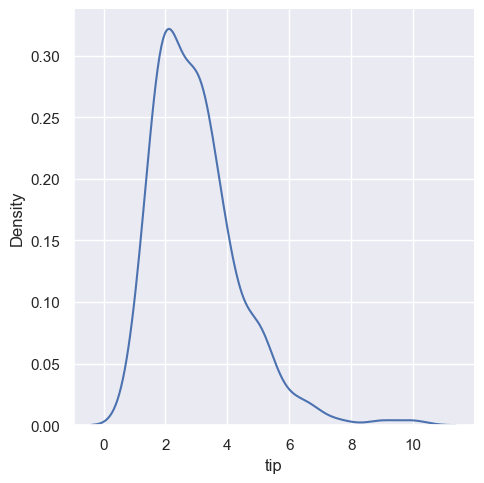

In [68]:
sns.displot(tips, x="tip", kind="kde")

Or the empirical cumulative distribution function:

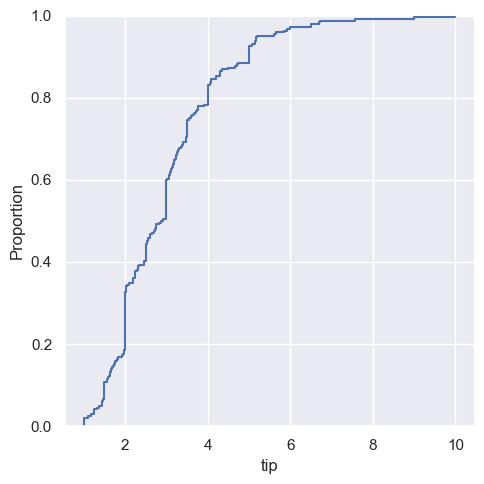

In [69]:
sns.displot(tips, x="tip", kind="ecdf")

### Box plots

We can make boxplots using the [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) function:

<Axes: xlabel='tip', ylabel='day'>

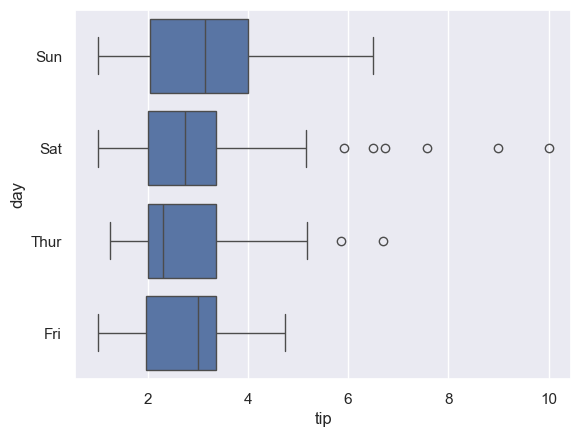

In [65]:
sns.boxplot(data=tips, y="day", x="tip")

You'll notice that the boxplot shows data that it determines to be outliers as circles, outside of the boxplot 'whiskers'. We can change this using the `whis` argument, to include all of the data within the whiskers:

<Axes: xlabel='tip', ylabel='day'>

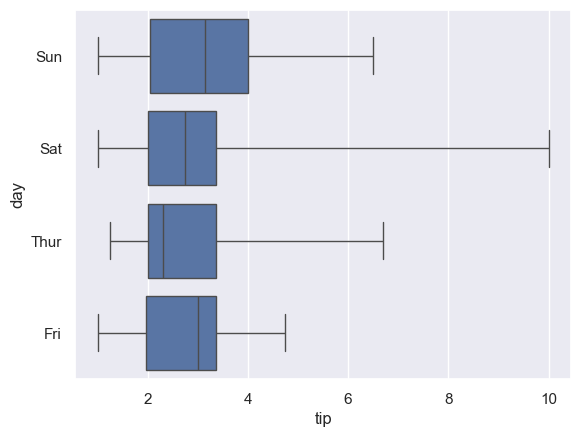

In [76]:
sns.boxplot(data=tips, y="day", x="tip", whis=(0, 100))

### Scatter Plots

Scatter plots use the [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function

<Axes: xlabel='total_bill', ylabel='tip'>

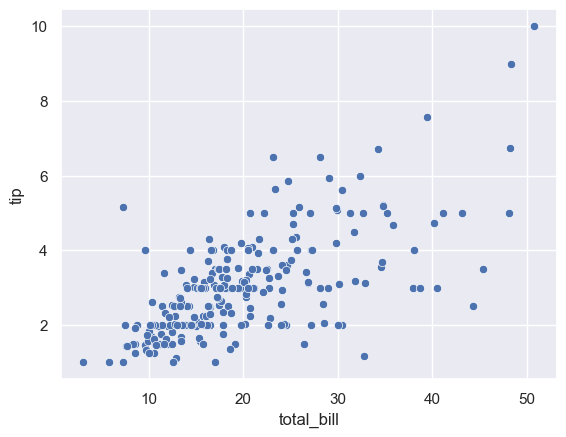

In [83]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

### Line Graphs

Let's switch over to the `flights` dataset, which looks like this:

In [85]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


We can then generate a line graph using the [`lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) function:

<Axes: xlabel='year', ylabel='passengers'>

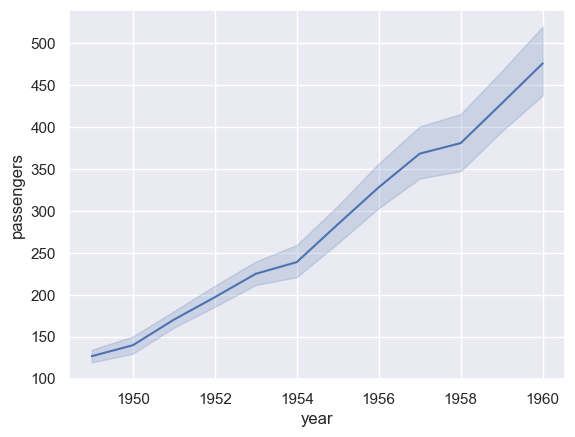

In [140]:
sns.lineplot(data=flights, x="year", y="passengers")

Note that our flight data contained the number of passengers, split by year *and* month. As a result, when we plot a line, it generates an error bar associated with it (as shown as a light blue cone above). If we want to remove that, we can use the `errorbar` argument to not display it:

<Axes: xlabel='year', ylabel='passengers'>

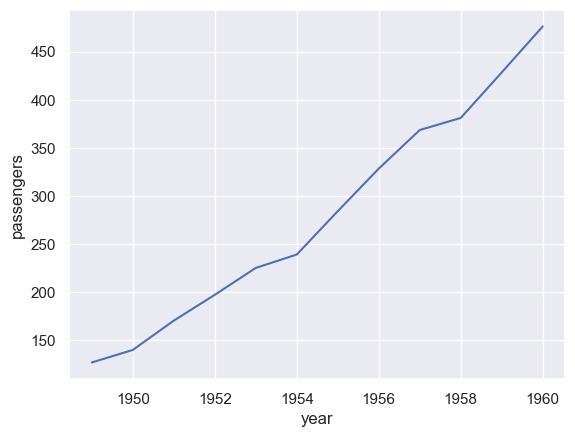

In [87]:
sns.lineplot(data=flights, x="year", y="passengers", errorbar=None)

Or we could instead use the `estimator` argument to find the total number of passengers, adding up those from each month:

<Axes: xlabel='year', ylabel='passengers'>

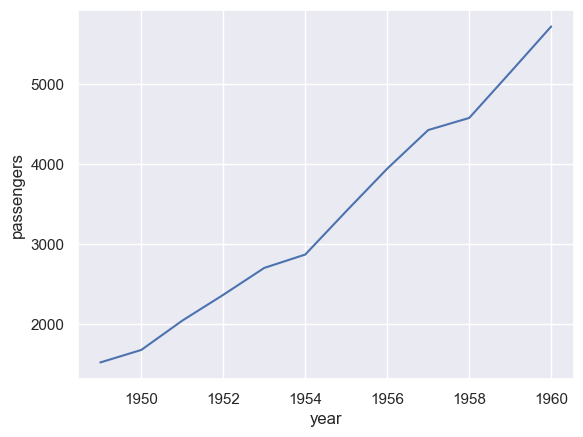

In [155]:
sns.lineplot(data=flights, x="year", y="passengers", estimator=sum, errorbar=None)

Alternatively, we can use `hue` to instead tell seaborn to segment each of our datasets based on the month variable. Note that this is possible in many forms of seaborn graphs for more segmented analysis:

<Axes: xlabel='year', ylabel='passengers'>

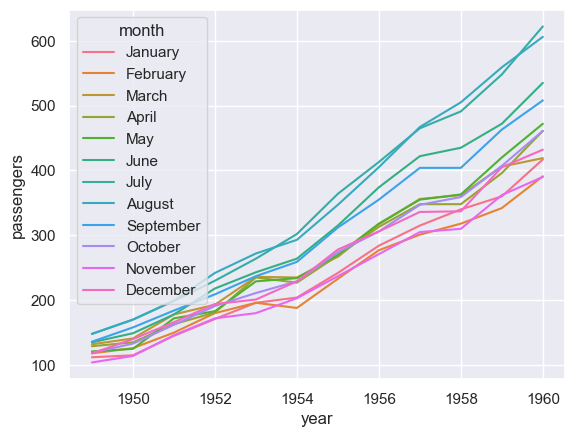

In [88]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

## Customising Your Seaborn Visualisations

Seaborn's API gives us variuous granular controls and arguments to customise how our graphs are rendered.

For example, let's say we want to add a title and customise the axis labels in the previous graph. We can do so in the following way:

Text(0, 0.5, 'Number of Passengers')

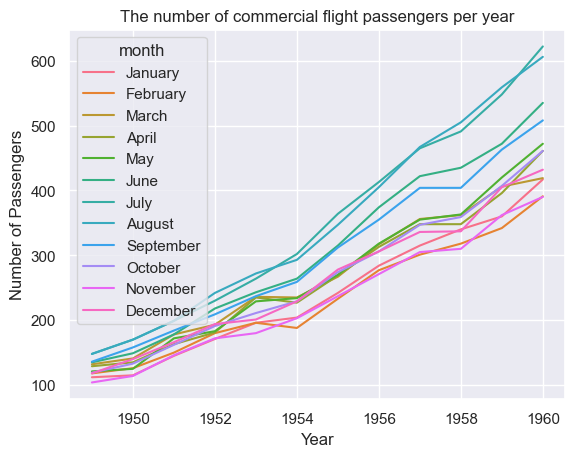

In [106]:
datavis = sns.lineplot(data=flights, x="year", y="passengers", hue="month")


datavis.set_title("The number of commercial flight passengers per year")
datavis.set_xlabel("Year")
datavis.set_ylabel("Number of Passengers")

We can also adjust the limits of our axes (i.e. where the graph starts and stops) in a similar way:

(0.0, 800.0)

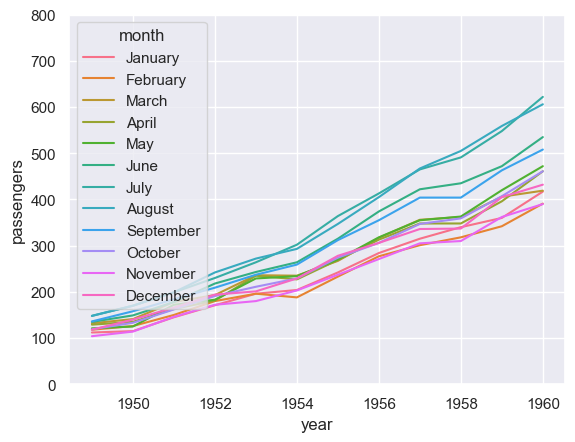

In [117]:
datavis = sns.lineplot(data=flights, x="year", y="passengers", hue="month")


datavis.set_ylim(0, 800)

Both Seaborn and matplotlib (the package that seaborn is built on top of) has a range of functions for customising various aspects of your visualisations. You should have a look over some of the tutorials available on the seaborn site, and consult the documentation for both [seaborn](https://seaborn.pydata.org/api.html) and [matplotlib](https://matplotlib.org/stable/api/index.html) when creating graphs to make sure that they best suit your given contexts.

## Relationships in Data

In the lecture, we discussed how correlation is a measurement of the strength between two variables. 

For example, let's say we have our taxis dataset:

In [119]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Pandas already comes with a `corr()` function, for creating a grid of correlations across variables. However, it can be temperamental when there are non-numeric variables in the dataset. So let's drop these and test the `corr()` function:

In [124]:
new_taxis = taxis.drop(columns = ['pickup', 'dropoff','color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough'])

new_taxis.corr()

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
fare,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
tip,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
tolls,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000


As we can see from the grid, there are correlations of various strengths.

Let's focus on one correlation, and plot it. Note that here we're using `regplot`, which is a scatter plot with a built-in 'line of best fit'.

Text(4, 27, 'Correlation = 0.02')

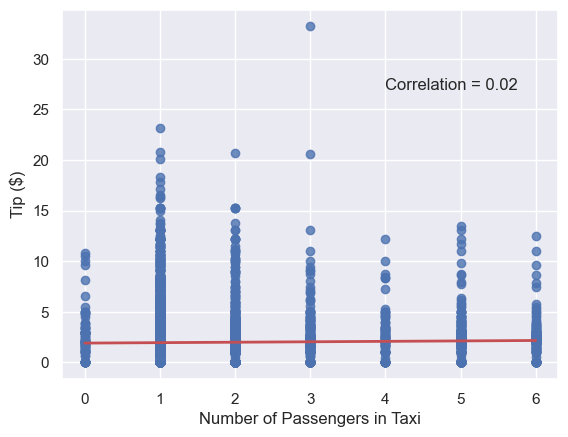

In [127]:
# Get the correlation of passengers against tips, and round it to two decimal places
small_corr = new_taxis.passengers.corr(new_taxis.tip)
small_corr = str(round(small_corr, 2))

# Create a scatterplot with a line of best fit, with no confidence interval, a line-width of 2, and a line colour of red
fig = sns.regplot(data=taxis, x="passengers", y="tip", ci=None, line_kws={"lw":2, "color":"r"})

# Adjust the labels
fig.set(xlabel ="Number of Passengers in Taxi", ylabel = "Tip ($)")

# Add the small_corr variable we created above as text on the visualisation
fig.text(4, 27, 'Correlation = ' + small_corr)



Those variables aren't very well correlated (r = .02). Let's try a different combination; this time of distance traveled and fare paid:

Text(25, 7, 'Correlation = 0.92')

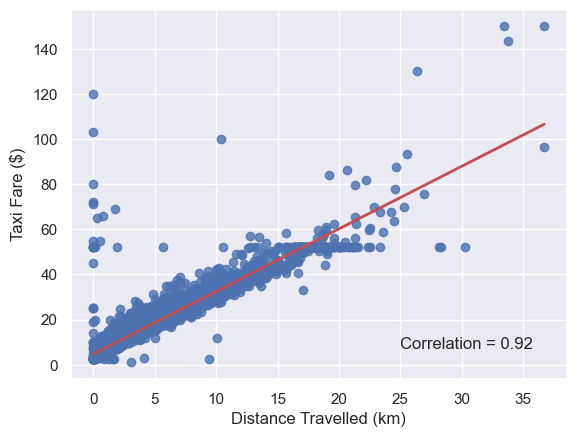

In [128]:
small_corr = taxis.distance.corr(taxis.fare)
small_corr = str(round(small_corr, 2))

fig = sns.regplot(data=taxis, x="distance", y="fare", ci=None, line_kws={"lw":2, "color":"r"})

fig.set(xlabel ="Distance Travelled (km)", ylabel = "Taxi Fare ($)")

fig.text(25, 7, 'Correlation = ' + small_corr)

This time the two variables are strongly positively correlated, which makes sense: As the distance a taxi travels, so too does its fare.

Let's see the correlations for another dataset, `mpg`, which looks at attributes of various cars. 

First, let's remove the non-numerical columns, and print the head

In [129]:
mpg = sns.load_dataset("mpg")

new_mpg = mpg.drop(columns = ['origin', 'name'])

new_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


Now, let's see the correlation grid of these variables:

In [130]:
new_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Again, lots of correlations of varying strength. Finally, let's plot the correlation between cars' horsepower, and how fuel efficient (in miles per gallon) they are:

Text(165, 35, 'Correlation = -0.78')

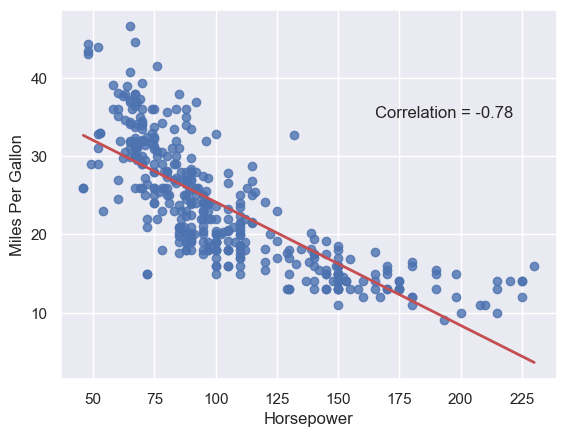

In [23]:
small_corr = mpg.mpg.corr(mpg.horsepower)
small_corr = str(round(small_corr, 2))

fig = sns.regplot(data=mpg, x="horsepower", y="mpg", ci=None, line_kws={"lw":2, "color":"r"})

fig.set(xlabel ="Horsepower", ylabel = "Miles Per Gallon")

fig.text(165, 35, 'Correlation = ' + small_corr)

As we can see from this graph, there is a medium-to-strong negative correlation between these variables; As the horsepower of cars increases, they tend to be less fuel efficient.

## Exercise

Now that you're familiar with more of seaborn's features, and have practiced using python to calculate correlation values, try the following exercises.

- Display the top 10 rows of the `diamond` dataset
- Create a visualisation showing the relationship between `carat` and `price`
- Modify the above visualisation to factor in the `cut` of the diamond
- Modify the axes of these graphs to take into account X and Y limits, add meaningful labels, and add a meaningful title
- Explore how the numerical values of this dataset correlate with each other

- Display the top 5 rows of the `car_crashes` dataset
- This time, create and modify three visualisations that show interesting trends in the dataset. Note that you may have to create a few different visualisations in order to find three that are interesting!
- Explore how the numerical values of this dataset correlate with each other

- Load the dataset(s) that you found on Kaggle during the first lab
- Explore how the numerical values of this dataset correlate with each other
- Generate and modify a selection of visualisations which map out interesting relationships in the variables

In [138]:
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
